# Исследование преступности в Бостоне

Данные представляют собой таблицу - криминальный отчет, дающий информацию о происшествиях в Бостоне, включая тип происшествий, дату, время и место.


Задачи
- Какие типы преступлений и происшествий наиболее распространены? 
- Исследуйте преступность в зависимости от района
- Где наиболее вероятны те или иные виды преступлений и происшествий?
- Зависит ли частота преступлений и происшествий от времени дня? Дня недели? Месяца? Года? 


## Шаг 1. Ознакомьтесь с данными.

In [1]:
import pandas as pd

crime = pd.read_csv('D:/crimes-in-boston/crime.csv', encoding = "ISO-8859-1")
crime.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [2]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


У нас есть таблица на 17 столбцов и 319 строк. 
Сразу видно, что данные нуждаются в предобработке: 
- Названия столбцов необходимо привести к нижнему регистру
- Необходимо решить вопрос с пропусками
- Необходимо в некоторых столбцах изменить тип данных. 

В столбцах содержится следующая информация: 
- INCIDENT_NUMBER - идентификационный номер инцидента 
- OFFENSE_CODE_GROUP - код, соответствующий классификации происшествий
- OFFENSE_DESCRIPTION - описание преступления
- DISTRICT - код района
- REPORTING_AREA - область
- SHOOTING - было ли применено оружие
- OCCURRED_ON_DATE - дата происшествия
- YEAR - год
- MONTH - месяц
- DAY_OF_WEEK - день недели
- HOUR - время (час)
- UCR_PART - по какой части проходит преступление в отчетности
- STREET - улица
- Lat - широта
- Long - долгота, 
- Location - локация.

## Вывод

У нас есть таблица с данными. В ней представлена информация о совершенных преступлениях и происшествиях, в том числе о дате, времени, месте, районе, было ли применено огнестрельное оружие и др. 

Данные нуждаются в предварительной обработке перед исследованием: необходимо избавиться от пропусков, проверить на дубликаты, привести данные к нужному формату. 

## Шаг 2. Предобработка данных

- Приведите формат данных к нижнему регистру
- Обработайте пропуски
- Проверьте данные на дубликаты
- Приведите типы данных к нужному формату

In [5]:
col = crime.columns
crime.columns = col.str.lower()
crime.columns

Index(['incident_number', 'offense_code', 'offense_code_group',
       'offense_description', 'district', 'reporting_area', 'shooting',
       'occurred_on_date', 'year', 'month', 'day_of_week', 'hour', 'ucr_part',
       'street', 'lat', 'long', 'location'],
      dtype='object')

In [6]:
crime['offense_code_group'] = crime['offense_code_group'].str.lower()
crime['offense_description'] = crime['offense_description'].str.lower()
crime['district'] = crime['district'].str.lower()
crime['shooting'] = crime['shooting'].str.lower()
crime['day_of_week'] = crime['day_of_week'].str.lower()
crime['ucr_part'] = crime['ucr_part'].str.lower()
crime['street'] = crime['street'].str.lower()

In [7]:
crime.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I182070945,619,larceny,larceny all others,d14,808,NaN,2018-09-02 13:00:00,2018,9,sunday,13,part one,lincoln st,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,vandalism,vandalism,c11,347,NaN,2018-08-21 00:00:00,2018,8,tuesday,0,part two,hecla st,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,towed,towed motor vehicle,d4,151,NaN,2018-09-03 19:27:00,2018,9,monday,19,part three,cazenove st,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,investigate property,investigate property,d4,272,NaN,2018-09-03 21:16:00,2018,9,monday,21,part three,newcomb st,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,investigate property,investigate property,b3,421,NaN,2018-09-03 21:05:00,2018,9,monday,21,part three,delhi st,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [8]:
crime.isna().sum()

incident_number             0
offense_code                0
offense_code_group          0
offense_description         0
district                 1765
reporting_area              0
shooting               318054
occurred_on_date            0
year                        0
month                       0
day_of_week                 0
hour                        0
ucr_part                   90
street                  10871
lat                     19999
long                    19999
location                    0
dtype: int64

Начнем обрабатывать пропуски со столбца district. Это код района, и этой информации, к сожалению, у нас нет. 
У нас есть столбец с точными координатами происшествия, и в нем пропусков нет. Если мы сможем разбить данные из него на столбцы с широтой и долготой, на основе получившихся данных, мы сможем запонить пропуски сразу в нескольких столбцах: район, улица, широта и долгота. 

In [9]:
crime['lap1'] = crime['location'].str.split(',').str.get(0) #разбили данные в столбце на 2 части, 
crime['lap1'].head()                                    #присоединили к новому столбцу первую из них

0    (42.35779134
1    (42.30682138
2    (42.34658879
3    (42.33418175
4    (42.27536542
Name: lap1, dtype: object

In [10]:
crime['lap1'] = crime['lap1'].map(lambda x: x.lstrip('(').rstrip('aAbBcC')) #убрали скобку
crime['lap1']

0         42.35779134
1         42.30682138
2         42.34658879
3         42.33418175
4         42.27536542
             ...     
319068    42.33695098
319069    42.25592648
319070    42.25592648
319071    42.30233307
319072    42.33383935
Name: lap1, Length: 319073, dtype: object

In [11]:
crime['lap1'] = pd.to_numeric(crime['lap1']).round(6)
crime['lap1']

0         42.357791
1         42.306821
2         42.346589
3         42.334182
4         42.275365
            ...    
319068    42.336951
319069    42.255926
319070    42.255926
319071    42.302333
319072    42.333839
Name: lap1, Length: 319073, dtype: float64

In [12]:
crime['long2'] = crime['location'].str.split(',').str.get(1)
crime['long2'].head()

0     -71.13937053)
1     -71.06030035)
2     -71.07242943)
3     -71.07866441)
4     -71.09036101)
Name: long2, dtype: object

In [13]:
crime['long2'] = crime['long2'].map(lambda x: x.lstrip('aAbBcC').rstrip(')')) #теперь удалили ) справа
crime['long2'].head()

0     -71.13937053
1     -71.06030035
2     -71.07242943
3     -71.07866441
4     -71.09036101
Name: long2, dtype: object

In [14]:
crime['long2'] = pd.to_numeric(crime['long2']).round(6)
crime['long2'].head()

0   -71.139371
1   -71.060300
2   -71.072429
3   -71.078664
4   -71.090361
Name: long2, dtype: float64

Теперь у нас есть 2 новых столбца: с широтой и долготой места. На их основе мы сможем, где это возможно, заменить пропуски в других столбцах. 

In [15]:
crime['lat'] = crime['lat'].fillna(crime['lap1'])
crime['long'] = crime['long'].fillna(crime['long2'])
crime.isna().sum()

incident_number             0
offense_code                0
offense_code_group          0
offense_description         0
district                 1765
reporting_area              0
shooting               318054
occurred_on_date            0
year                        0
month                       0
day_of_week                 0
hour                        0
ucr_part                   90
street                  10871
lat                         0
long                        0
location                    0
lap1                        0
long2                       0
dtype: int64

Посмотрим, сколько улиц мы сможем заполнить с максимальной точностью: сопоставив координаты по широте и долготе. 


In [16]:
crime['street'] = crime.sort_values(by=['lat', 'long'])['street'].fillna(method='ffill')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 19 columns):
incident_number        319073 non-null object
offense_code           319073 non-null int64
offense_code_group     319073 non-null object
offense_description    319073 non-null object
district               317308 non-null object
reporting_area         319073 non-null object
shooting               1019 non-null object
occurred_on_date       319073 non-null object
year                   319073 non-null int64
month                  319073 non-null int64
day_of_week            319073 non-null object
hour                   319073 non-null int64
ucr_part               318983 non-null object
street                 319073 non-null object
lat                    319073 non-null float64
long                   319073 non-null float64
location               319073 non-null object
lap1                   319073 non-null float64
long2                  319073 non-null float64
dtypes: float64(4

Что мы сделали: 

Мы отсортировали данные по широте и долготе, а потом использовали метод ffill для заполнения нулевых значений: этот метод заполняет пропуск на первое ненулевое значение, а поскольку строки с пропущенными улицами оказались в максимально близком порядке по координатам к остальным улицам, мы можем быть уверены в том, что значения вместо пропусков оказались максимально близкими к точным. 

Теперь мы можем заполнить район в соответствии с улицей. 

In [17]:
crime['district'] = crime.groupby('street')['district'].fillna(method='ffill')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 19 columns):
incident_number        319073 non-null object
offense_code           319073 non-null int64
offense_code_group     319073 non-null object
offense_description    319073 non-null object
district               318354 non-null object
reporting_area         319073 non-null object
shooting               1019 non-null object
occurred_on_date       319073 non-null object
year                   319073 non-null int64
month                  319073 non-null int64
day_of_week            319073 non-null object
hour                   319073 non-null int64
ucr_part               318983 non-null object
street                 319073 non-null object
lat                    319073 non-null float64
long                   319073 non-null float64
location               319073 non-null object
lap1                   319073 non-null float64
long2                  319073 non-null float64
dtypes: float64(4

Нам удалось избавиться от примерно 1000 нулевых значений, однако некоторые значения заполнить таким методом не удалось: вероятно, речь идет об улицах, значения которых уникальны (не повторяются), поэтому для оставшихся значений воспользуемся снова сортировкой:

In [18]:
crime['district'] = crime.sort_values(by=['lat', 'long'])['district'].fillna(method='ffill')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 19 columns):
incident_number        319073 non-null object
offense_code           319073 non-null int64
offense_code_group     319073 non-null object
offense_description    319073 non-null object
district               319056 non-null object
reporting_area         319073 non-null object
shooting               1019 non-null object
occurred_on_date       319073 non-null object
year                   319073 non-null int64
month                  319073 non-null int64
day_of_week            319073 non-null object
hour                   319073 non-null int64
ucr_part               318983 non-null object
street                 319073 non-null object
lat                    319073 non-null float64
long                   319073 non-null float64
location               319073 non-null object
lap1                   319073 non-null float64
long2                  319073 non-null float64
dtypes: float64(4

Значения заполнились не все: это возможно в том случае, если nan сгруппировались каким-то образом по краям. Изменим порядок сортировки и проверим, что получится:

In [19]:
crime['district'] = crime.sort_values(by=['lat', 'long'], ascending=False)['district'].fillna(method='ffill')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 19 columns):
incident_number        319073 non-null object
offense_code           319073 non-null int64
offense_code_group     319073 non-null object
offense_description    319073 non-null object
district               319073 non-null object
reporting_area         319073 non-null object
shooting               1019 non-null object
occurred_on_date       319073 non-null object
year                   319073 non-null int64
month                  319073 non-null int64
day_of_week            319073 non-null object
hour                   319073 non-null int64
ucr_part               318983 non-null object
street                 319073 non-null object
lat                    319073 non-null float64
long                   319073 non-null float64
location               319073 non-null object
lap1                   319073 non-null float64
long2                  319073 non-null float64
dtypes: float64(4

На этот раз у нас получилось избавиться от всех пропусков в этих столбцах. 

Теперь разберемся с пропусками в столбце ucr_part.

In [20]:
crime['ucr_part'].value_counts()

part three    158553
part two       97569
part one       61629
other           1232
Name: ucr_part, dtype: int64

In [21]:
crime['ucr_part'] = crime.groupby('offense_code_group')['ucr_part'].fillna(method='ffill')

In [22]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 19 columns):
incident_number        319073 non-null object
offense_code           319073 non-null int64
offense_code_group     319073 non-null object
offense_description    319073 non-null object
district               319073 non-null object
reporting_area         319073 non-null object
shooting               1019 non-null object
occurred_on_date       319073 non-null object
year                   319073 non-null int64
month                  319073 non-null int64
day_of_week            319073 non-null object
hour                   319073 non-null int64
ucr_part               318987 non-null object
street                 319073 non-null object
lat                    319073 non-null float64
long                   319073 non-null float64
location               319073 non-null object
lap1                   319073 non-null float64
long2                  319073 non-null float64
dtypes: float64(4

Похоже, мы имеем дело с типом преступлений, для которых не определен код. Проверим это:

In [23]:
crime.loc[crime['ucr_part'].isna()].index

Int64Index([  1252,   9214,  11592,  19577,  22316,  22651,  33879,  35746,
             37644,  37770,  40803,  42505,  52748,  55595,  63201,  66087,
             70885,  72656,  74245,  78228,  79660,  80826,  83362,  85989,
             86369,  87199,  92623,  97186,  97838, 104885, 111239, 114374,
            114375, 116265, 118025, 126322, 131608, 132422, 133612, 133875,
            134640, 134771, 135681, 138671, 138878, 138941, 140889, 143620,
            146154, 152300, 154192, 156654, 158877, 166325, 166962, 170261,
            170763, 172026, 172168, 172336, 174803, 176684, 179467, 179742,
            181328, 187553, 188262, 191223, 192796, 192813, 195300, 199009,
            202895, 204026, 204590, 207027, 209445, 226633, 227860, 235995,
            237665, 239863, 240846, 241106, 241806, 255412],
           dtype='int64')

In [24]:
query_crime = crime.loc[[  1252,   9214,  11592,  19577,  22316,  22651,  33879,  35746,
             37644,  37770,  40803,  42505,  52748,  55595,  63201,  66087,
             70885,  72656,  74245,  78228,  79660,  80826,  83362,  85989,
             86369,  87199,  92623,  97186,  97838, 104885, 111239, 114374,
            114375, 116265, 118025, 126322, 131608, 132422, 133612, 133875,
            134640, 134771, 135681, 138671, 138878, 138941, 140889, 143620,
            146154, 152300, 154192, 156654, 158877, 166325, 166962, 170261,
            170763, 172026, 172168, 172336, 174803, 176684, 179467, 179742,
            181328, 187553, 188262, 191223, 192796, 192813, 195300, 199009,
            202895, 204026, 204590, 207027, 209445, 226633, 227860, 235995,
            237665, 239863, 240846, 241106, 241806, 255412]]

In [25]:
query_crime['offense_description'].value_counts()

home invasion                                77
human trafficking - commercial sex acts       7
human trafficking - involuntary servitude     2
Name: offense_description, dtype: int64

In [26]:
query_crime_2 = crime.query('offense_description == "home invasion"or offense_description == "human trafficking - involuntary servitude" or offense_description == "human trafficking - human trafficking - involuntary servitude"')
query_crime_2['ucr_part'].value_counts()

Series([], Name: ucr_part, dtype: int64)

In [27]:
query_crime_2.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location,lap1,long2
1252,I182069560,2010,home invasion,home invasion,c6,915,NaN,2018-08-30 08:19:00,2018,8,thursday,8,NaN,e ninth st,42.331463,-71.050126,"(42.33146325, -71.05012560)",42.331463,-71.050126
9214,I182060810,2010,home invasion,home invasion,e18,493,NaN,2018-08-01 14:52:00,2018,8,wednesday,14,NaN,reddy ave,42.262855,-71.111811,"(42.26285498, -71.11181148)",42.262855,-71.111811
11592,I182058223,2010,home invasion,home invasion,a7,907,NaN,2018-07-24 05:23:00,2018,7,tuesday,5,NaN,havre st,42.369912,-71.040926,"(42.36991243, -71.04092628)",42.369912,-71.040926
19577,I182049767,2010,home invasion,home invasion,b2,297,NaN,2018-06-25 16:37:00,2018,6,monday,16,NaN,saint richard st,42.323190,-71.083564,"(42.32318974, -71.08356389)",42.323190,-71.083564
22316,I182046836,2010,home invasion,home invasion,c11,347,NaN,2018-06-16 02:31:00,2018,6,saturday,2,NaN,lyon st,42.306383,-71.060212,"(42.30638323, -71.06021218)",42.306383,-71.060212


Похоже, действительно для этих значений не определено, по какой части проходит преступление в отчетности. В связи с этим, мы можем заменить Nan на значение "other".

Также в последнем из оставшихся столбцов с пропусками - shooting - заменим пропуски на False, т.к. они означают, вероятнее всего, отсутствие факта применения огнестрельного оружия.

In [28]:
crime['ucr_part'] = crime['ucr_part'].fillna('other')
crime['shooting'] = crime['shooting'].fillna('false')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 19 columns):
incident_number        319073 non-null object
offense_code           319073 non-null int64
offense_code_group     319073 non-null object
offense_description    319073 non-null object
district               319073 non-null object
reporting_area         319073 non-null object
shooting               319073 non-null object
occurred_on_date       319073 non-null object
year                   319073 non-null int64
month                  319073 non-null int64
day_of_week            319073 non-null object
hour                   319073 non-null int64
ucr_part               319073 non-null object
street                 319073 non-null object
lat                    319073 non-null float64
long                   319073 non-null float64
location               319073 non-null object
lap1                   319073 non-null float64
long2                  319073 non-null float64
dtypes: float64

Нам удалось избавиться от пропущенных значений и при этом не потерять данных. 

Теперь необходимо проверить данные на дубликаты:

In [29]:
crime.duplicated().sum()

27

Избавимся от найденных дубликатов:

In [30]:
crime = crime.drop_duplicates().reset_index(drop=True)
crime.duplicated().sum()

0

In [31]:
crime.drop(['lap1', 'long2'], axis='columns', inplace=True) #избавимся также от лишних столбцов

Теперь заменим типы данных в столбцах на верные там, где это необходимо.

In [32]:
crime['occurred_on_date'] = pd.to_datetime(crime['occurred_on_date'], format='%Y-%m-%d %H:%M:%S')
crime['occurred_on_date'].head()

0   2018-09-02 13:00:00
1   2018-08-21 00:00:00
2   2018-09-03 19:27:00
3   2018-09-03 21:16:00
4   2018-09-03 21:05:00
Name: occurred_on_date, dtype: datetime64[ns]

## Вывод

В этом разделе мы подготовили данные для дальнейшего исследования: очистили от дубликатов и нулевых значений, привели формат данных к необходимому типу значений. 

## Шаг 3. Исследование данных

В этом шаге ответим на следующие вопросы:
- Какие типы преступлений и происшествий наиболее распространены? 
- Исследуйте преступность в зависимости от района
- Где наиболее вероятны те или иные виды преступлений и происшествий?
- Зависит ли частота преступлений и происшествий от времени дня? Дня недели? Месяца? Года? 


Для начала, чтобы ответить на первый вопрос, посмотрим, какие значения принимает столбец по типу преступлений:

In [33]:
crime['offense_code_group'].value_counts()

motor vehicle accident response              37132
larceny                                      25935
medical assistance                           23540
investigate person                           18749
other                                        18073
                                             ...  
gambling                                         8
human trafficking                                7
biological threat                                2
human trafficking - involuntary servitude        2
burglary - no property taken                     2
Name: offense_code_group, Length: 66, dtype: int64

Мы сразу видим, что всего выведено 66 типов происшествий, а также сразу видим, что на первом месте по частоте - автомобильные аварии, на втором - воровство, на третьем - случаи вызова медицинской помощи. На последнем - биологическая угроза, торговля людьми и взлом без хищения имущества.  

In [34]:
import matplotlib.pyplot as plt
import math
import seaborn as sns 
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20


In [35]:
crime_query = crime[['offense_code_group', 'district', 'offense_description']]
crime_pivot = crime_query.pivot_table(index='offense_code_group', columns = 'district', values='offense_description', aggfunc='count')
crime_pivot

district,a1,a15,a7,b2,b3,c11,c6,d14,d4,e13,e18,e5
offense_code_group,,,,,,,,,,,,
aggravated assault,968.0,131.0,336.0,1650.0,1134.0,1036.0,505.0,314.0,873.0,344.0,301.0,215.0
aircraft,NaN,1.0,33.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
arson,8.0,5.0,5.0,18.0,12.0,7.0,4.0,6.0,12.0,6.0,2.0,9.0
assembly or gathering violations,239.0,4.0,16.0,455.0,18.0,34.0,33.0,62.0,53.0,13.0,15.0,13.0
auto theft,364.0,102.0,184.0,871.0,578.0,738.0,431.0,273.0,617.0,299.0,227.0,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...
towed,1325.0,347.0,551.0,960.0,642.0,1178.0,1363.0,1490.0,1988.0,841.0,303.0,299.0
vandalism,1213.0,393.0,804.0,2437.0,1918.0,2416.0,1198.0,1038.0,1764.0,826.0,758.0,649.0
verbal disputes,220.0,176.0,523.0,3011.0,2958.0,2620.0,514.0,472.0,656.0,517.0,942.0,490.0


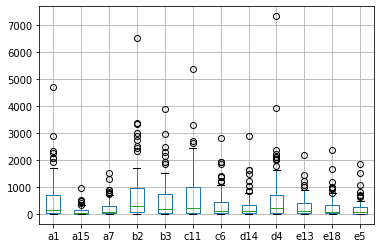

In [36]:
crime_pivot.boxplot()

Этот график отображает структуру распределения количества преступлений для каждого из районов. Частота значений отображается по значениям видов происшествий. 

Мы можем видеть, что есть районы, где встречаются очень высокие показатели некоторых видов преступлений: так, в районе c11, например, некий вид происшествий превысил 5000 случаев, а также в этом районе в целом уровень преступности более высокий в сравнении с остальными (межквартильный развмах значительно выше), а районе d4 некий тип происшествий превысил 7000 значений. Также мы можем отметить район с наименьшим количеством преступности и происшествий: район а15. 

Мы видим, что структурно районы очень различаются между собой.

Посмотрим, на распределение суммарного количество происшествий по районам. 

In [37]:
sum_crime = crime.groupby('district')['offense_description'].count().sort_values()
sum_crime

district
a15     6610
e5     13345
a7     13596
e18    17381
e13    17590
d14    20226
c6     23830
b3     35535
a1     35924
d4     42066
c11    42678
b2     50265
Name: offense_description, dtype: int64

Лидируют по преступности районы b2, c11, d4. А меньше всего происшествий - в a15, e5 и a7. 

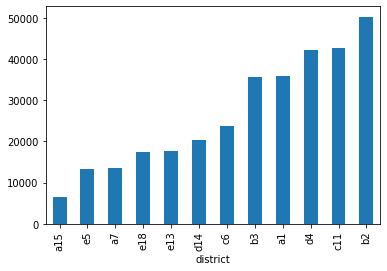

In [38]:
sum_crime.plot(kind='bar')

Всего у нас 12 районов, и теперь необходимо изучить структуру преступности по ним, чтобы ответить на вопросы: 

- Какие виды происшествий характерны для этих районов? Какие улицы в них наиболее опасны? 
- Как отличаются районы между собой по структуре проишествий? 

Изучим детально структуры происшествий 2х наименее опасных и 2х наиболее опасных районов.

Исследуем район a15: самый благополучный из исследуемых районов.

In [39]:
crime_a15 = crime.query('district == "a15"')
crime_a15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6610 entries, 123 to 318661
Data columns (total 17 columns):
incident_number        6610 non-null object
offense_code           6610 non-null int64
offense_code_group     6610 non-null object
offense_description    6610 non-null object
district               6610 non-null object
reporting_area         6610 non-null object
shooting               6610 non-null object
occurred_on_date       6610 non-null datetime64[ns]
year                   6610 non-null int64
month                  6610 non-null int64
day_of_week            6610 non-null object
hour                   6610 non-null int64
ucr_part               6610 non-null object
street                 6610 non-null object
lat                    6610 non-null float64
long                   6610 non-null float64
location               6610 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 929.5+ KB


Всего в этом районе зафиксировано 6610 случаев нарушений. 

In [40]:
crime_a15['street'].value_counts()

bunker hill st    469
vine st           391
main st           382
medford st        330
summer st         234
                 ... 
rver                1
new whitney         1
cary pl             1
auburn sq           1
commercial st       1
Name: street, Length: 331, dtype: int64

Всего в этом районе задействована 331 улица. Из них чаще всего нарушения происходят на улицах bunker hill st, vine st, main st, medford st и summer st.

Возьмем топ 10 по количеству происшествий улиц этого района и посмотрим, какие нарушения на них наиболее распространены.

In [41]:
top_a15 = crime_a15['street'].value_counts().head(10) #10 наиболее опасных улиц в районе
top_a15

bunker hill st    469
vine st           391
main st           382
medford st        330
summer st         234
austin st         205
cambridge st      180
rutherford ave    178
walford way       168
warren st         160
Name: street, dtype: int64

In [42]:
crime_top_a15 = crime_a15['offense_code_group'].value_counts().head(10) #10 наиболее частых происшествий
crime_top_a15

motor vehicle accident response    972
larceny                            511
medical assistance                 488
investigate person                 469
vandalism                          393
towed                              347
drug violation                     339
larceny from motor vehicle         316
other                              310
simple assault                     258
Name: offense_code_group, dtype: int64

Наиболее частыми происшествиями в этом районе можно назвать ДТП, воровство и вызов мед. помощи. 

In [43]:
top_a15_pivot = crime_a15.query('street in @top_a15.index and offense_code_group in @crime_top_a15.index').pivot_table(index='offense_code_group', columns='street', values = 'offense_description', aggfunc='count')
top_a15_pivot

street,austin st,bunker hill st,cambridge st,main st,medford st,rutherford ave,summer st,vine st,walford way,warren st
offense_code_group,,,,,,,,,,
drug violation,15.0,33.0,7.0,16.0,20.0,1.0,6.0,116.0,6.0,10.0
investigate person,11.0,43.0,7.0,14.0,22.0,7.0,4.0,27.0,23.0,4.0
larceny,18.0,27.0,7.0,28.0,23.0,8.0,117.0,3.0,6.0,2.0
larceny from motor vehicle,5.0,5.0,4.0,16.0,27.0,7.0,1.0,2.0,3.0,9.0
medical assistance,8.0,35.0,9.0,30.0,19.0,9.0,5.0,12.0,17.0,5.0
motor vehicle accident response,40.0,30.0,79.0,96.0,38.0,89.0,2.0,3.0,6.0,16.0
other,11.0,32.0,5.0,13.0,19.0,5.0,6.0,7.0,12.0,28.0
simple assault,21.0,27.0,4.0,14.0,15.0,8.0,8.0,3.0,13.0,8.0
towed,3.0,32.0,4.0,17.0,19.0,4.0,NaN,3.0,NaN,10.0


In [44]:
rcParams['figure.figsize'] = 7, 10

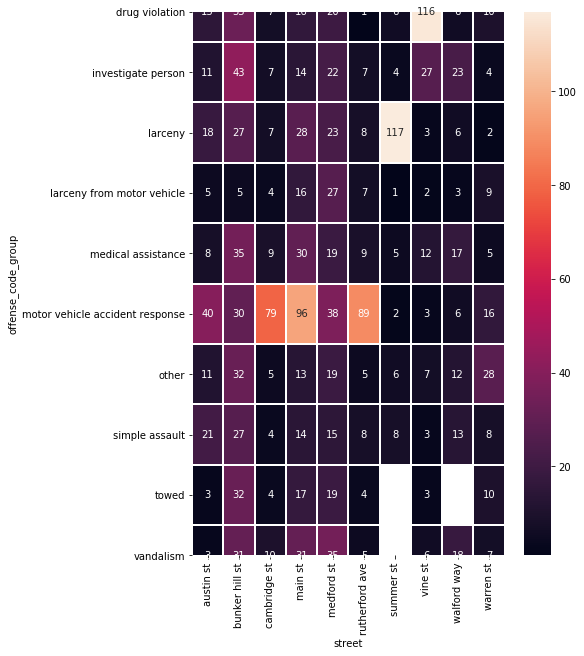

In [45]:
sns.heatmap(top_a15_pivot, annot=True, fmt='.0f', linewidth=1)

Мы видим карту событий по улицам этого района. По оси y отложены улицы, по оси х - виды происшествий. 

Белые поля - это пропуски, которые означают, что на указанных улицах таких видов происшествий зафиксировано не было. 

По залитым цветом ячейкам можно быстро понять частоту того или иного происшествия: чем светлее ячейка, тем чаще происходили происшествия, чем темнее - тем реже. 

Так, мы сразу можем увидеть следующую информацию: 
- На summer st наиболее часто среди остальных улиц встречается воровство, другие правонарушения - крайне редко,
- С употреблением запрещенных веществ можно столкнуться почти только на vine st,
- ДТП - лидер по нарушениям по всему району - встречается чаще всего на cambridge st, main st и rutherford ave,
- bunker hill st и medford st выделяются среди остальных улиц тем, что на них можно столкнуться почти с любым из 10 наиболее встречающихся происшествий в районе. Иными словами, дисперсия нарушений на этих улицах очень велика. 


Исследуем район e5

In [46]:
crime_e5 = crime.query('district == "e5"')

In [47]:
top_street_e5 = crime_e5['street'].value_counts().head(10) #10 наиболее опасных улиц в районе
top_street_e5

washington st     1625
centre st         1181
vfw pkwy           651
belgrade ave       310
cummins hwy        294
spring st          232
georgetowne dr     219
south st           186
schroeder plz      176
poplar st          175
Name: street, dtype: int64

По количеству нарушений лидируют улицы washington st, centre st, vfw pkwy.

In [48]:
crime_top_e5 = crime_e5['offense_code_group'].value_counts().head(10) #10 наиболее частых происшествий
crime_top_e5

motor vehicle accident response    1857
medical assistance                 1510
investigate person                 1062
other                               810
drug violation                      715
vandalism                           649
larceny                             637
simple assault                      493
verbal disputes                     490
larceny from motor vehicle          436
Name: offense_code_group, dtype: int64

Наиболее часто встречаются такие происшествия, как ДТП, вызов мед. помощи и судебное преследование.  

In [49]:
top_e5_pivot = crime_e5.query('street in @top_street_e5.index and offense_code_group in @crime_top_e5.index').pivot_table(index='offense_code_group', columns='street', values = 'offense_description', aggfunc='count')
top_e5_pivot

street,belgrade ave,centre st,cummins hwy,georgetowne dr,poplar st,schroeder plz,south st,spring st,vfw pkwy,washington st
offense_code_group,,,,,,,,,,
drug violation,20.0,136.0,16.0,4.0,13.0,11.0,12.0,2.0,22.0,141.0
investigate person,18.0,121.0,21.0,18.0,14.0,2.0,6.0,19.0,55.0,97.0
larceny,7.0,68.0,9.0,8.0,6.0,1.0,12.0,15.0,56.0,99.0
larceny from motor vehicle,2.0,16.0,5.0,4.0,2.0,NaN,10.0,5.0,14.0,52.0
medical assistance,35.0,99.0,23.0,32.0,23.0,14.0,14.0,22.0,59.0,121.0
motor vehicle accident response,65.0,224.0,43.0,10.0,31.0,9.0,39.0,42.0,72.0,231.0
other,23.0,58.0,21.0,12.0,9.0,NaN,11.0,13.0,62.0,93.0
simple assault,8.0,32.0,37.0,12.0,8.0,NaN,3.0,12.0,38.0,65.0
vandalism,13.0,44.0,13.0,14.0,4.0,NaN,12.0,11.0,15.0,81.0


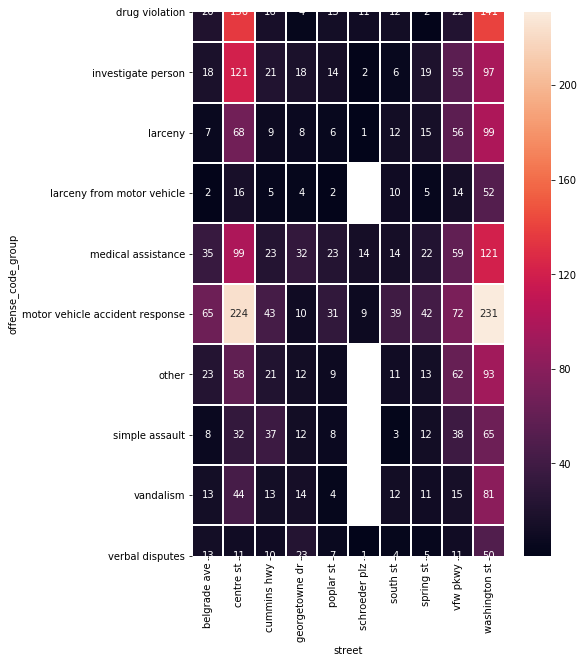

In [50]:
sns.heatmap(top_e5_pivot, annot=True, fmt='.0f', linewidth=1)

- ДТП чаще всего встречается на centre st, washington st и vfw pkwy,
- Медицинская помощь чаще всего требуется на washington st и centre st,
- washington st самая опасная из улиц этого района: она отличается широкой дисперсией частых нарушений и происшествий.

Теперь посмотрим на наиболее опасные районы. 

Начнем с района c11:

In [51]:
crime_c11 = crime.query('district == "c11"')

In [52]:
top_street_c11 = crime_c11['street'].value_counts().head(10) #10 наиболее опасных улиц в районе
top_street_c11

dorchester ave              4391
washington st               2395
adams st                    1916
geneva ave                  1497
bowdoin st                  1412
hancock st                  1074
columbia rd                  986
gibson st                    788
gallivan blvd                616
william t morrissey blvd     590
Name: street, dtype: int64

Наиболее опасные улицы этого района: dorchester ave, washington st и adams st. Вероятно, washington st крупная улица, относящаяся к разным районам и в целом опасная вне зависимости от района.

In [53]:
crime_top_c11 = crime_c11['offense_code_group'].value_counts().head(10) #10 наиболее частых происшествий
crime_top_c11

motor vehicle accident response    5358
medical assistance                 3286
investigate person                 2686
verbal disputes                    2620
other                              2441
vandalism                          2416
drug violation                     2222
larceny                            2185
simple assault                     2128
investigate property               1362
Name: offense_code_group, dtype: int64

Наиболее частые происшествия в этом районе - ДТП, вызов мед помощи, судебные взыскания и споры. 

In [54]:
top_c11_pivot = crime_c11.query('street in @top_street_c11.index and offense_code_group in @crime_top_c11.index').pivot_table(index='offense_code_group', columns='street', values = 'offense_description', aggfunc='count')
top_c11_pivot

street,adams st,bowdoin st,columbia rd,dorchester ave,gallivan blvd,geneva ave,gibson st,hancock st,washington st,william t morrissey blvd
offense_code_group,,,,,,,,,,
drug violation,95,43,62,243,56,77,163,307,60,24
investigate person,92,78,49,237,34,63,113,163,137,29
investigate property,61,33,27,83,13,38,94,29,54,16
larceny,81,121,41,393,103,143,7,16,235,118
medical assistance,148,111,70,324,29,100,75,40,143,38
motor vehicle accident response,416,186,196,670,63,187,27,75,247,46
other,106,88,66,274,34,105,29,47,193,33
simple assault,70,92,51,288,20,98,9,29,182,28
vandalism,90,78,33,195,29,52,12,30,144,19


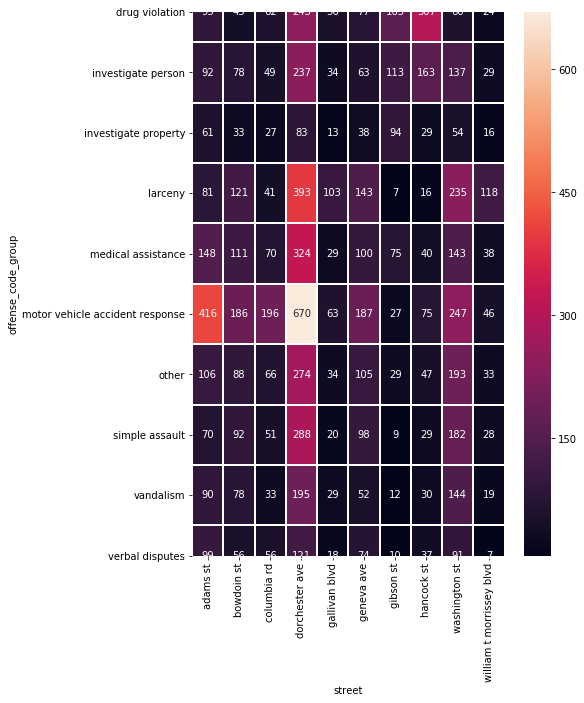

In [55]:
sns.heatmap(top_c11_pivot, annot=True, fmt='.0f', linewidth=1)

- ДТП чаще всего случается на dorchester ave и adams st,
- Воровство чаще всего встречается на dorchester ave и washington st, 
- Мед. помощь чаще всего требуется на dorchester ave, adams st и washington st,
- Улицы dorchester ave, adams st  и washington st  более всего характеризуются разнообразием происшествий.

Ну и наконец, рассмотрим самый опасный район b2.

In [56]:
crime_b2 = crime.query('district == "b2"')

In [57]:
top_street_b2 = crime_b2['street'].value_counts().head(10) #10 наиболее опасных улиц в районе
top_street_b2

blue hill ave     2960
washington st     2515
dudley st         2370
columbia rd       1773
warren st         1615
tremont st         958
huntington ave     668
humboldt ave       659
seaver st          658
harrison ave       614
Name: street, dtype: int64

Наиболее опасные улицы этого района: blue hill ave, washington st и blue hill ave. 

In [58]:
crime_top_b2 = crime_b2['offense_code_group'].value_counts().head(10) #10 наиболее частых происшествий
crime_top_b2

motor vehicle accident response    6504
medical assistance                 3366
other                              3340
verbal disputes                    3011
larceny                            2883
investigate person                 2753
simple assault                     2520
vandalism                          2437
drug violation                     2323
investigate property               1710
Name: offense_code_group, dtype: int64

Наиболее частые происшествия в этом районе - ДТП, вызов мед помощи, примерно одинаково часто встречаются: судебные взыскания и споры, воровство, нападение и др. вид правонарушений. 

In [59]:
top_b2_pivot = crime_b2.query('street in @top_street_b2.index and offense_code_group in @crime_top_b2.index').pivot_table(index='offense_code_group', columns='street', values = 'offense_description', aggfunc='count')
top_b2_pivot

street,blue hill ave,columbia rd,dudley st,harrison ave,humboldt ave,huntington ave,seaver st,tremont st,warren st,washington st
offense_code_group,,,,,,,,,,
drug violation,131,91,125,56,31,11,38,18,72,327
investigate person,129,88,132,26,37,39,28,52,75,203
investigate property,51,60,53,7,27,15,18,33,32,78
larceny,238,128,164,42,32,60,25,166,166,177
medical assistance,134,105,143,21,41,76,51,69,124,189
motor vehicle accident response,643,327,331,83,113,132,80,110,187,152
other,147,105,191,81,45,29,33,44,161,187
simple assault,132,108,130,35,30,31,36,47,93,117
vandalism,119,77,75,25,30,27,31,32,53,54


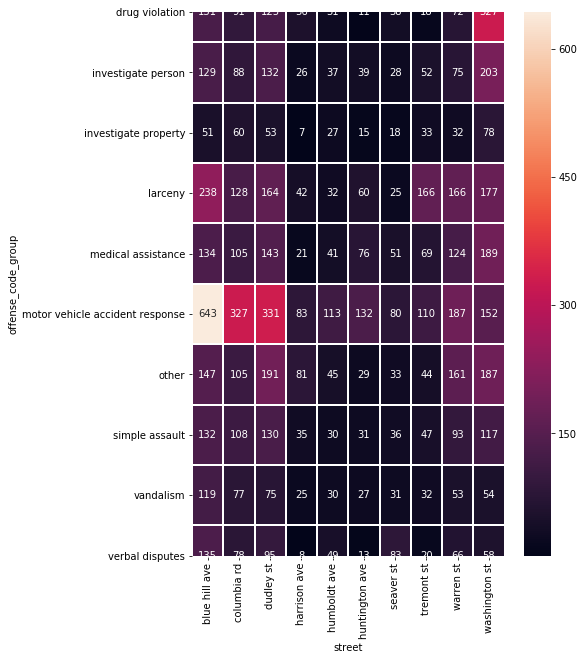

In [60]:
sns.heatmap(top_b2_pivot, annot=True, fmt='.0f', linewidth=1)

- ДТП чаще всего случается на blue hill ave, dudley st и columbia rd,
- Воровство чаще всего встречается на blue hill ave и washington st, 
- На washington st чаще всего встречается употоребление запрещенных веществ,
- Улицы blue hill ave, dudley st  и washington st  более всего характеризуются разнообразием происшествий.

Возьмем 10 наиболее распрастраненных типов происшествий и посмотрим, где они случаются чаще всего.

In [61]:
top_10_crime = crime['offense_code_group'].value_counts().head(10)
top_10_crime

motor vehicle accident response    37132
larceny                            25935
medical assistance                 23540
investigate person                 18749
other                              18073
drug violation                     16545
simple assault                     15826
vandalism                          15414
verbal disputes                    13099
towed                              11287
Name: offense_code_group, dtype: int64

In [62]:
cut_crime = crime.query('offense_code_group in @top_10_crime.index')
cut_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195600 entries, 0 to 319039
Data columns (total 17 columns):
incident_number        195600 non-null object
offense_code           195600 non-null int64
offense_code_group     195600 non-null object
offense_description    195600 non-null object
district               195600 non-null object
reporting_area         195600 non-null object
shooting               195600 non-null object
occurred_on_date       195600 non-null datetime64[ns]
year                   195600 non-null int64
month                  195600 non-null int64
day_of_week            195600 non-null object
hour                   195600 non-null int64
ucr_part               195600 non-null object
street                 195600 non-null object
lat                    195600 non-null float64
long                   195600 non-null float64
location               195600 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 26.9+ MB


In [63]:
cut_crime_pivot = cut_crime.pivot_table(index = 'offense_code_group', columns = 'district', values = 'offense_description', aggfunc = 'count')
cut_crime_pivot

district,a1,a15,a7,b2,b3,c11,c6,d14,d4,e13,e18,e5
offense_code_group,,,,,,,,,,,,
drug violation,2087,339,903,2323,1514,2222,1843,691,2039,1089,780,715
investigate person,1624,469,894,2753,2466,2686,1399,1210,2099,893,1194,1062
larceny,4712,511,746,2883,1214,2185,1926,1630,7318,1204,969,637
medical assistance,2249,488,1302,3366,2283,3286,1934,1645,2371,1426,1680,1510
motor vehicle accident response,2877,972,1529,6504,3868,5358,2798,2892,3920,2177,2380,1857
other,2059,310,773,3340,2154,2441,1236,855,2093,1008,994,810
simple assault,2328,258,685,2520,1833,2128,1072,854,2223,718,714,493
towed,1325,347,551,960,642,1178,1363,1490,1988,841,303,299
vandalism,1213,393,804,2437,1918,2416,1198,1038,1764,826,758,649


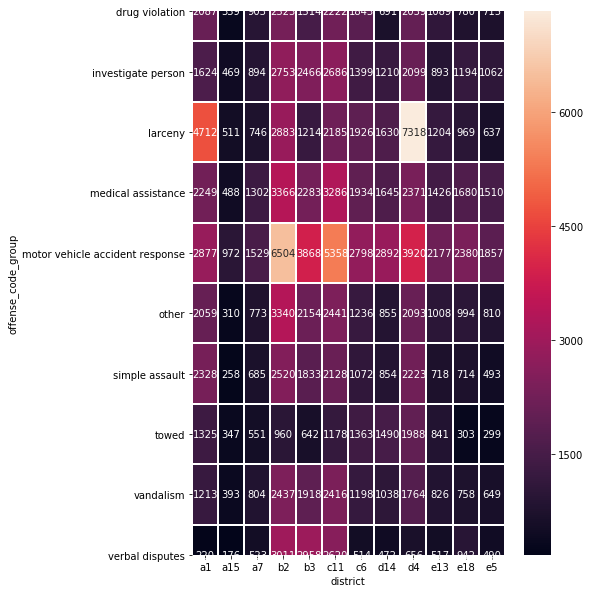

In [64]:
sns.heatmap(cut_crime_pivot, annot=True, fmt='.0f', linewidths = 1)

Из этой карты можно сделать следующие выводы касаемо наиболее распространенных типов происшествий и нарушений:
- Употребление запрещенных веществ наиболее вероятна одинаково в районах b2, d4 и c11,
- Судебное преследование - в районах b2, b3, c11,
- Кражи - в районах d4, a1 и b2
- Вызов медпомощи наиболее часто необходим в районах b2, c11 и d4,
- ДТП наиболее часто случаются в районах b2, c11 и d4,
- Нападения - в районах b2, a1 и d4,
- Вызов эвакуации - в районах d4, d14, c6,
- Вандализм - в районах b2, c11, b3,
- Скандалы - в районах b2, b3, c11.

Теперь исследуем, зависит ли частота преступлений и происшествий от времени дня? Дня недели? Месяца? Года?

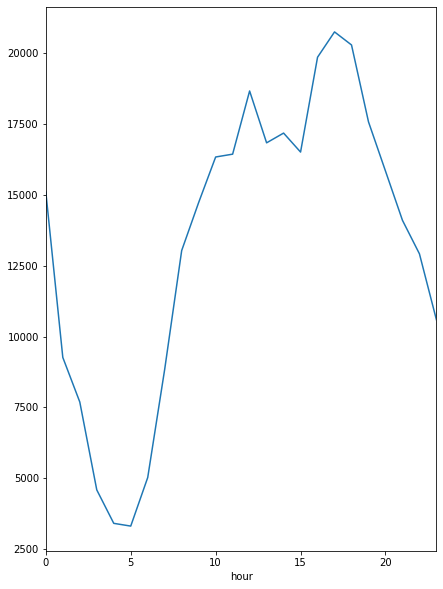

In [65]:
timeday = crime[['hour', 'offense_description']]
timeday_grouped = timeday.groupby('hour')['offense_description'].count().plot()

По этому графику мы можем видеть следующее: 
- Зависимость количества преступлений от времени дня нелинейна,
- Самое маленькое количество преступлений происходит в рассветные часы: в 4-5 часов утра, очевидно, преступники тоже спят, 
- Затем преступность начинает линейно и резко расти, вплоть до своего пикового значения в районе 17 часов, при этом наблюдаем небольшой провал роста между 13 и 15 часами (вероятно, в это время на улицах слишком много народу, т.к. это обеденное время),
- После 17 часов количество происшествий начинает резко падать, некоторый пик наблюдается возле полуночи, падение продолжается вплоть до рассветных часов. 


Посмотрим, заивисит ли вид преступления от часа?

In [66]:
hour_pivot = cut_crime.pivot_table(index = 'hour', columns = 'offense_code_group', values = 'offense_description', aggfunc = 'count')
hour_pivot

offense_code_group,drug violation,investigate person,larceny,medical assistance,motor vehicle accident response,other,simple assault,towed,vandalism,verbal disputes
hour,,,,,,,,,,
0,491,766,997,936,1190,739,858,461,816,526
1,270,447,399,738,890,553,778,240,534,346
2,182,391,299,595,969,424,711,176,480,255
3,92,262,184,417,611,230,290,127,264,198
4,106,200,145,368,391,152,202,97,216,127
5,42,169,146,377,513,140,135,170,222,114
6,160,213,229,410,870,206,181,298,320,186
7,188,402,495,581,1428,387,311,1212,503,320
8,300,592,901,881,1854,762,412,1442,628,438


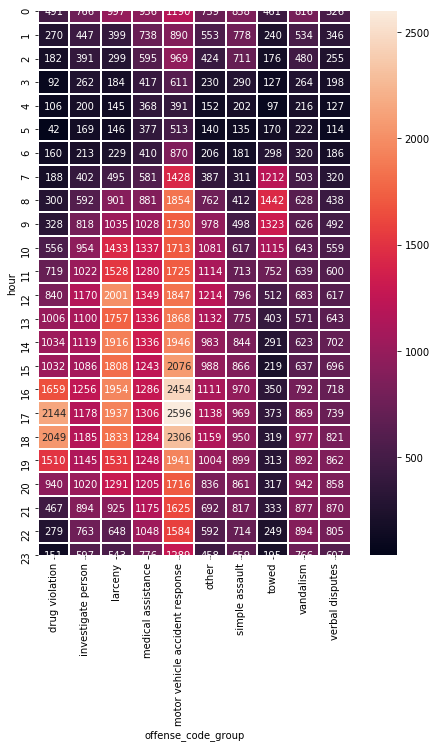

In [67]:
sns.heatmap(hour_pivot, annot=True, linewidths=1, fmt='.0f')

В целом, за исключением эвакуации, которая чаще всего случается в утренние часы, нет оснований полагать, что для каждого вида преступлений существует некий особый час, когда оно происходит чаще: для всех наиболее распространенных преступлений пик приходится на уже выявленный нами раннее промежуток 15-17 часов. 

Однако если разбить сутки на периоды: ночь (с 00 до 5), утро (с 5 до 11), день (с 11 до 15), вечер (с 15 до 00), можно увидеть, что: 
- ночью чаще всего происходят ДТП, вызов мед. помощи и нападения, 
- утром - ДТП, кражи и эвакуации, 
- днем - ДТП, кражи и вызов мед.помощи,
- вечером - ДТП, кражи и употребление запрещенных веществ. 

Ответим на вопрос, зависит ли частота преступлений и происшествий от дня недели.

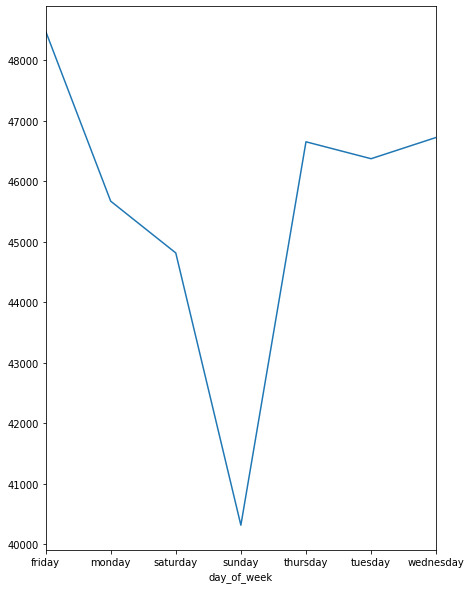

In [68]:
day_weeks = crime[['offense_code_group', 'day_of_week']]
day_weeks_grouped = day_weeks.groupby('day_of_week')['offense_code_group'].count().plot()

Мы видим четко выраженную нелинейную зависимость количества преступлений от дня недели. 

- Чаще всего преступления происходят в пятницу. Возможно, это связано с тем, что по пятницам люди часто ходят развлекаться и в частности чаще употребляют алкоголь, что может провоцировать их либо на роль жертвы либо на роль преступника, а также чаще могут происходить аварии по причине вождения в нетрезвом виде, 
- В другие будние дни - понедельник, вторник, среду и пятницу - уровень преступности примерно на одинаково высоком уровне,  
- В субботу уровень снижается, а в воскресенье он доходит до своего условного "дна": вероятно, это связано с тем, что в эти дни люди чаще проводят дома в кругу семьи, и отсюда меньше шансов попасть в неприятность. 

In [69]:
day_weeks_pivot = cut_crime.pivot_table(index = 'day_of_week', columns = 'offense_code_group', values = 'offense_description', aggfunc = 'count')
day_weeks_pivot

offense_code_group,drug violation,investigate person,larceny,medical assistance,motor vehicle accident response,other,simple assault,towed,vandalism,verbal disputes
day_of_week,,,,,,,,,,
friday,2700,2928,3959,3381,5852,2692,2374,1599,2228,1772
monday,2548,2665,3732,3441,5119,2656,2062,1701,2132,1925
saturday,2034,2425,3604,3154,5490,2180,2410,1806,2437,1912
sunday,1063,2353,3080,3018,5023,2077,2478,1423,2420,2007
thursday,2708,2751,3836,3518,5187,2909,2162,1644,2025,1896
tuesday,2723,2821,3875,3456,5210,2769,2138,1658,2071,1796
wednesday,2769,2806,3849,3572,5251,2790,2202,1456,2101,1791


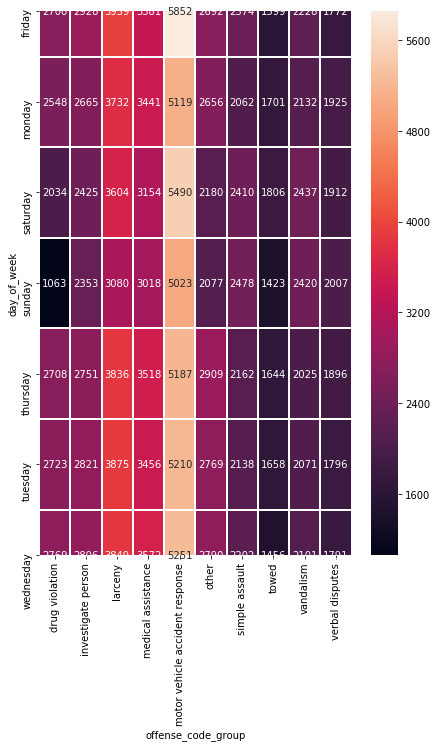

In [70]:
sns.heatmap(day_weeks_pivot, annot=True, linewidths=1, fmt='.0f')

Нельзя четко провести ассоциацию между днем недели и наиболее характерным для него видом происшествия: ДТП, вызов мед.помощи и кражи доминируют вне зависимости от дня недели. 

Исследуем преступность в зависимости от месяца. 

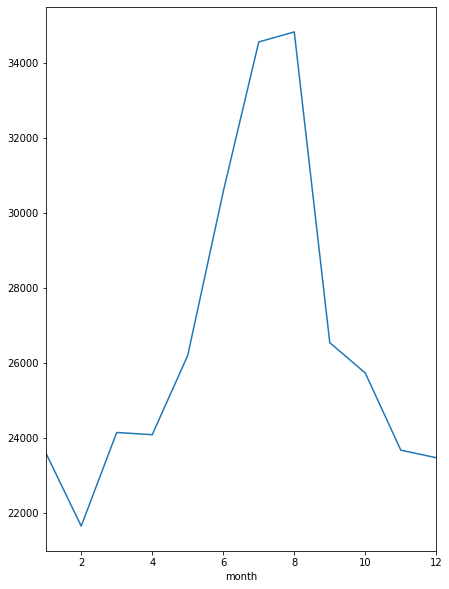

In [71]:
month = crime[['offense_code_group', 'month']]
month_grouped = crime.groupby('month')['offense_code_group'].count().plot()

Мы можем сделать выводы о четкой зависимости между месяцем и количеством преступлений: 
- В феврале преступлений меньше всего, а пик преступности приходится на сентябрь, 
- С февраля по сентябрь преступность резко растет, а с сентября по февраль - резко падает. 
- В целом, в летний период преступность несоразмеримо выше, чем в позднеосенние и зимние месяцы. Веротяно, это может быть связано с тем, что зимой люди реже ездят на машинах и чаще пользуются общественным транспортом (возможно, реже случаются ДТП), чаще сидят по домам в свободное время (меньше риск попасть в неприятности). Также, вероятно, зимой люди в целом осторожнее чем летом: существует стериотип, что преступления чаще случаются в темное время суток (мы выяснили уже, что это не так), летом темнеет позже, люди менее осторожны, потому что светлое время суток ассоциируется у них с бОльшей безопасностью. Также в летнее время люди чаще ездят в отпуск, что означает пустые дома, а также расслабленные и настроенные на отдых люди могут чаще становиться жертвами краж и нападений. 

In [85]:
month_pivot = cut_crime.pivot_table(index = 'month', columns = 'offense_code_group', values = 'offense_description', aggfunc = 'count')
month_pivot

offense_code_group,drug violation,investigate person,larceny,medical assistance,motor vehicle accident response,other,simple assault,towed,vandalism,verbal disputes
month,,,,,,,,,,
1,1197,1204,1919,1827,2746,1467,1219,713,1155,1098
2,1224,1119,1617,1716,2534,1318,992,787,1059,977
3,1502,1326,1723,2001,2909,1461,1170,894,1088,987
4,1231,1336,1842,1933,2738,1346,1291,846,1221,1017
5,1348,1504,1981,2210,3030,1468,1432,1012,1244,1151
6,1586,1674,2522,2253,3535,1678,1559,1108,1479,1230
7,1838,1926,2994,2394,3841,1901,1708,1086,1649,1462
8,1692,2167,2972,2278,3980,2010,1675,1347,1795,1464
9,1331,1727,2187,1820,3043,1534,1176,938,1209,998


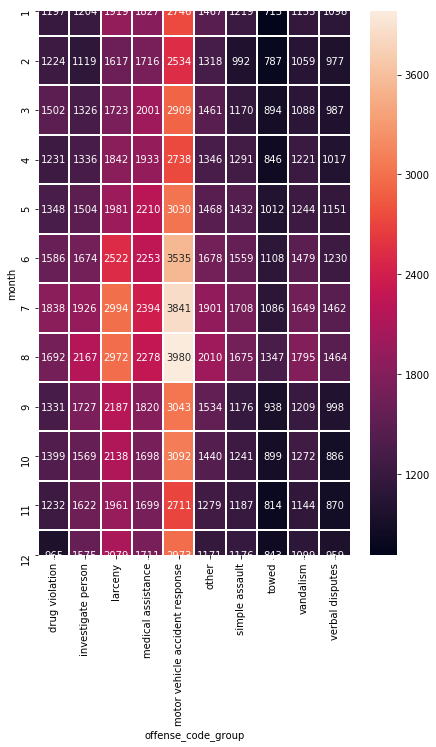

In [73]:
sns.heatmap(month_pivot, annot=True, linewidths=1, fmt='.0f')

Согласно этому графику, нельзя для каждого вида преступности выделить специфический для него месяц: в целом все наиболее распространенные типы происшествий случаются в летние месяцы чаще, а в зимние месяцы - реже. 

Ну и наконец, посмотрим, как менялась преступность по годам.  

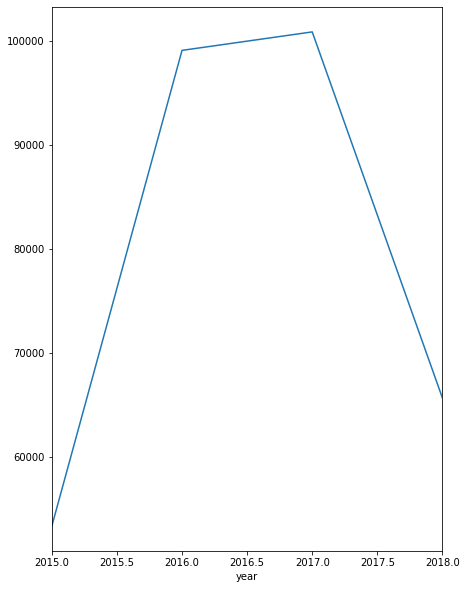

In [74]:
crime_year = crime.groupby('year')['offense_code_group'].count()
crime_year.plot()

По этому графику можно видеть, что у нас есть данные с 2015 по 2018 года. При этом мы видим резкий рост уровня преступности, начиная с 2015 года, и резкий спад - с 2017. 

Есть вероятность, что мы могли получить такие данные в связи с неполными данными за начальный (2015) год и за конечный (2018). Убедимся, что в данных, представленных за эти года, присутствуют все месяцы, а иначе необходимо будет ограничить данные с двух сторон по этим годам. 

In [79]:
year2015 = crime.query('year == 2015')['month'].value_counts()
year2015

9     8411
8     8340
7     8322
10    8304
12    7987
11    7818
6     4188
Name: month, dtype: int64

In [80]:
year2018 = crime.query('year == 2018')['month'].value_counts()
year2018

5    8906
6    8834
7    8538
8    8337
4    7916
1    7782
3    7768
2    6937
9     667
Name: month, dtype: int64

Мы видим, что года действительно не полные. Посмотрим на разницу между 2016 и 2017 годами:

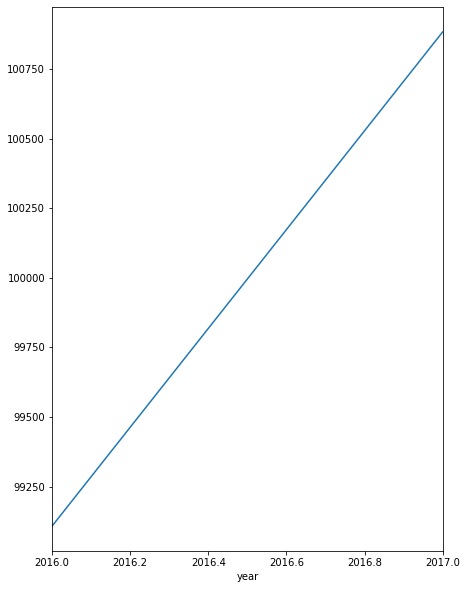

In [83]:
crime_year2 = crime.query('2015 < year < 2018').groupby('year')['offense_code_group'].count()
crime_year2.plot()

Мы видим, что в 2017 году было совершено больше преступлений, чем в 2016.

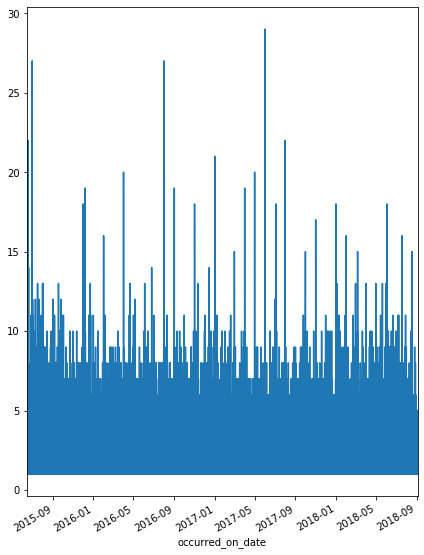

In [84]:
date_crime = crime.groupby('occurred_on_date')['offense_code_group'].count()
date_crime.plot()

Этот график более наглядно демонстрирует изменение общего уровня преступности с течением времени.

Согласно этому графику мы видим, что: 
- Преступность с течением времени меняется неравномерно. В "спокойное" время года уровень преступности примерно одинаков вне зависимости от года, 
- В "пиковое" время года (летние месяцы) преступность была примерно одинакова в течение 2015, 2016 годов, несколько повышена в 2017 - и сравнительно низкая в 2018 году. 

Посмотрим, менялись ли типы происшествий, наиболее часто случающиеся, в зависимости от года.

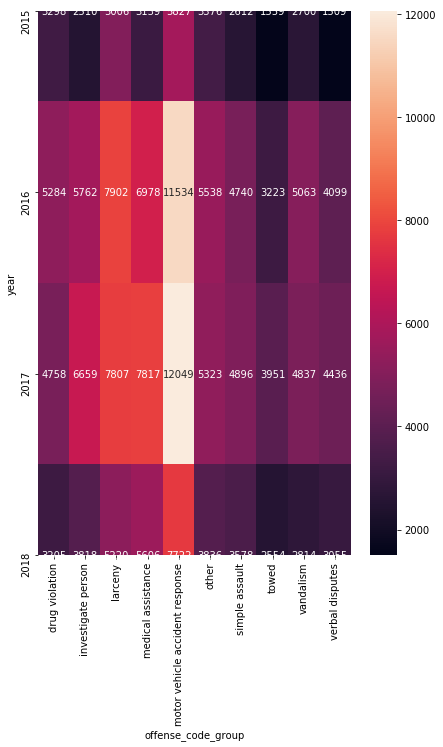

In [88]:
year = cut_crime[['year', 'offense_code_group', 'offense_description']]
year_pivot = year.pivot_table(index = 'year', columns = 'offense_code_group', values = 'offense_description', aggfunc = 'count')
sns.heatmap(year_pivot, annot = True, fmt = '.0f')

Согласно графику, мы видим, что нет зависимости между годом и наиболее распространенным типом происшествий. 

## Вывод

- В данных представлено 66 типов происшествий, из них на первом месте по частоте - автомобильные аварии, на втором - воровство, на третьем - случаи вызова медицинской помощи. На последнем - биологическая угроза, торговля людьми и взлом без хищения имущества.

- Есть районы, где встречаются очень высокие показатели некоторых видов преступлений: так, в районе c11, например, некий вид происшествий превысил 5000 случаев, а также в этом районе в целом уровень преступности более высокий в сравнении с остальными (межквартильный развмах значительно выше), а районе d4 некий тип происшествий превысил 7000 значений. Также мы можем отметить район с наименьшим количеством преступности и происшествий: район а15.

- Структурно районы очень различаются между собой.

- Лидируют по преступности районы b2, c11, d4. А меньше всего происшествий - в a15, e5 и a7.

Исследуем район a15: самый благополучный из исследуемых районов.

- Всего в этом районе зафиксировано 6610 случаев нарушений.

- Всего в этом районе задействована 331 улица. Из них чаще всего нарушения происходят на улицах bunker hill st, vine st, main st, medford st и summer st.

- Наиболее частыми происшествиями в этом районе можно назвать ДТП, воровство и вызов мед. помощи.

- На summer st наиболее часто среди остальных улиц встречается воровство, другие правонарушения - крайне редко,
- С употреблением запрещенных веществ можно столкнуться почти только на vine st,
- ДТП - лидер по нарушениям по всему району - встречается чаще всего на cambridge st, main st и rutherford ave,
- bunker hill st и medford st выделяются среди остальных улиц тем, что на них можно столкнуться почти с любым из 10 наиболее встречающихся происшествий в районе. Иными словами, дисперсия нарушений на этих улицах очень велика.

Исследуем район e5

- По количеству нарушений лидируют улицы washington st, centre st, vfw pkwy.

- Наиболее часто встречаются такие происшествия, как ДТП, вызов мед. помощи и судебное преследование.

- ДТП чаще всего встречается на centre st, washington st и vfw pkwy,
- Медицинская помощь чаще всего требуется на washington st и centre st,
- washington st самая опасная из улиц этого района: она отличается широкой дисперсией частых нарушений и происшествий.

Исследуем наиболее опасные районы:

Район c11:

- Наиболее опасные улицы этого района: dorchester ave, washington st и adams st. Вероятно, washington st крупная улица, относящаяся к разным районам и в целом опасная вне зависимости от района.

- Наиболее частые происшествия в этом районе - ДТП, вызов мед помощи, судебные взыскания и споры.

- ДТП чаще всего случается на dorchester ave и adams st,
- Воровство чаще всего встречается на dorchester ave и washington st,
- Мед. помощь чаще всего требуется на dorchester ave, adams st и washington st,
- Улицы dorchester ave, adams st и washington st более всего характеризуются разнообразием происшествий.

Район b2:

- Наиболее опасные улицы этого района: blue hill ave, washington st и blue hill ave.

- Наиболее частые происшествия в этом районе - ДТП, вызов мед помощи, примерно одинаково часто встречаются: судебные взыскания и споры, воровство, нападение и др. вид правонарушений.

- ДТП чаще всего случается на blue hill ave, dudley st и columbia rd,
- Воровство чаще всего встречается на blue hill ave и washington st,
- На washington st чаще всего встречается употоребление запрещенных веществ,
- Улицы blue hill ave, dudley st и washington st более всего характеризуются разнообразием происшествий.

Также мы смогли сделать следующие выводы касаемо распространенности различных типов происшествий по районам:

- Употребление запрещенных веществ наиболее вероятна одинаково в районах b2, d4 и c11,
- Судебное преследование - в районах b2, b3, c11,
- Кражи - в районах d4, a1 и b2
- Вызов медпомощи наиболее часто необходим в районах b2, c11 и d4,
- ДТП наиболее часто случаются в районах b2, c11 и d4,
- Нападения - в районах b2, a1 и d4,
- Вызов эвакуации - в районах d4, d14, c6,
- Вандализм - в районах b2, c11, b3,
- Скандалы - в районах b2, b3, c11.

Выводы зависимости преступности от времени дня, дня недели, месяца и года:

- Зависимость количества преступлений от времени дня нелинейна,

- Самое маленькое количество преступлений происходит в рассветные часы: в 4-5 часов утра, очевидно, преступники тоже спят,
Затем преступность начинает линейно и резко расти, вплоть до своего пикового значения в районе 17 часов, при этом наблюдаем небольшой провал роста между 13 и 15 часами (вероятно, в это время на улицах слишком много народу, т.к. это обеденное время),

- После 17 часов количество происшествий начинает резко падать, некоторый пик наблюдается возле полуночи, падение продолжается вплоть до рассветных часов.

- В целом, за исключением эвакуации, которая чаще всего случается в утренние часы, нет оснований полагать, что для каждого вида преступлений существует некий особый час, когда оно происходит чаще: для всех наиболее распространенных преступлений пик приходится на уже выявленный нами раннее промежуток 15-17 часов.

- Однако если разбить сутки на периоды: ночь (с 00 до 5), утро (с 5 до 11), день (с 11 до 15), вечер (с 15 до 00), можно увидеть, что:

- ночью чаще всего происходят ДТП, вызов мед. помощи и нападения,
- утром - ДТП, кражи и эвакуации,
- днем - ДТП, кражи и вызов мед.помощи,
- вечером - ДТП, кражи и употребление запрещенных веществ.


- Нельзя четко провести ассоциацию между днем недели и наиболее характерным для него видом происшествия: ДТП, вызов мед.помощи и кражи доминируют вне зависимости от дня недели.

Мы можем сделать выводы о четкой зависимости между месяцем и количеством преступлений:

- В феврале преступлений меньше всего, а пик преступности приходится на сентябрь,
- С февраля по сентябрь преступность резко растет, а с сентября по февраль - резко падает.
- В целом, в летний период преступность несоразмеримо выше, чем в позднеосенние и зимние месяцы. Веротяно, это может быть связано с тем, что зимой люди реже ездят на машинах и чаще пользуются общественным транспортом (возможно, реже случаются ДТП), чаще сидят по домам в свободное время (меньше риск попасть в неприятности). Также, вероятно, зимой люди в целом осторожнее чем летом: существует стериотип, что преступления чаще случаются в темное время суток (мы выяснили уже, что это не так), летом темнеет позже, люди менее осторожны, потому что светлое время суток ассоциируется у них с бОльшей безопасностью. Также в летнее время люди чаще ездят в отпуск, что означает пустые дома, а также расслабленные и настроенные на отдых люди могут чаще становиться жертвами краж и нападений.

- Нельзя для каждого вида преступности выделить специфический для него месяц: в целом все наиболее распространенные типы происшествий случаются в летние месяцы чаще, а в зимние месяцы - реже.

Касаемо изменчивости по годам: 

- Преступность с течением времени меняется неравномерно. В "спокойное" время года уровень преступности примерно одинаков вне зависимости от года,
- В "пиковое" время года (летние месяцы) преступность была примерно одинакова в течение 2015, 2016 годов, несколько повышена в 2017 - и сравнительно низкая в 2018 году.

- Нет зависимости между годом и наиболее распространенным типом происшествий. 

# Общий вывод

Нам была дана таблица с данными. В ней представлена информация о совершенных преступлениях и происшествиях, в том числе о дате, времени, месте, районе, было ли применено огнестрельное оружие и др. 

Мы ознакомились с данными и подготовили их для дальнейшего исследования: очистили от дубликатов и нулевых значений, привели формат данных к необходимому типу значений.

Далее мы исследовали данные для решения следующих задач: 

- Какие типы преступлений и происшествий наиболее распространены? 
- Исследуйте преступность в зависимости от района
- Где наиболее вероятны те или иные виды преступлений и происшествий?
- Зависит ли частота преступлений и происшествий от времени дня? Дня недели? Месяца? Года? 

Мы можем ответить на эти вопросы следующим образом:

I. Какие типы преступлений и происшествий наиболее распространены? 


- В данных представлено 66 типов происшествий, из них на первом месте по частоте - автомобильные аварии, на втором - воровство, на третьем - случаи вызова медицинской помощи. На последнем - биологическая угроза, торговля людьми и взлом без хищения имущества.

- Всего мы смогли выделить 10 наиболее распространенных типов происшествий: 

[х] Употребление запрещенных веществ,
[х] Судебное преследование,
[х] Кражи,
[х] Вызов медпомощи,
[х] ДТП,
[х] Нападения,
[х] Вызов эвакуации,
[х] Вандализм,
[х] Скандалы,
[х] "Другие" - категория, в которой собрались происшествия, которые нельзя отнести в остальные 65 категорий.

II. Исследуйте преступность в зависимости от района.

- Структурно районы очень различаются между собой.

- Лидируют по преступности районы b2, c11, d4. А меньше всего происшествий - в a15, e5 и a7.

- В наиболее безопасных районов наиболее часто случаются такие типы нарушений порядка, как ДТП, вызов мед. помощи, воровство и судебное преследование.

- В наиболее опасных районах наиболее часто случаются такие типы нарушений порядка, как ДТП, вызов мед. помощи, воровство, судебные взыскания и споры, а также нападения.

- Самые опасные улицы в Бостоне: blue hill ave, washington st и blue hill ave.

III. Где наиболее вероятны те или иные виды преступлений и происшествий?

Структура типов происшествий по районам:

- Употребление запрещенных веществ наиболее вероятна одинаково в районах b2, d4 и c11,
- Судебное преследование - в районах b2, b3, c11,
- Кражи - в районах d4, a1 и b2
- Вызов медпомощи наиболее часто необходим в районах b2, c11 и d4,
- ДТП наиболее часто случаются в районах b2, c11 и d4,
- Нападения - в районах b2, a1 и d4,
- Вызов эвакуации - в районах d4, d14, c6,
- Вандализм - в районах b2, c11, b3,
- Скандалы - в районах b2, b3, c11.

IV. Зависит ли частота преступлений и происшествий от времени дня? Дня недели? Месяца? Года?


- Зависимость количества преступлений от времени дня нелинейна,

- Самое маленькое количество преступлений происходит в рассветные часы: в 4-5 часов утра, очевидно, преступники тоже спят, затем преступность начинает линейно и резко расти, вплоть до своего пикового значения в районе 17 часов, при этом наблюдаем небольшой провал роста между 13 и 15 часами (вероятно, в это время на улицах слишком много народу, т.к. это обеденное время),

- После 17 часов количество происшествий начинает резко падать, некоторый пик наблюдается возле полуночи, падение продолжается вплоть до рассветных часов.

- В целом, за исключением эвакуации, которая чаще всего случается в утренние часы, нет оснований полагать, что для каждого вида преступлений существует некий особый час, когда оно происходит чаще: для всех наиболее распространенных преступлений пик приходится на уже выявленный нами раннее промежуток 15-17 часов.

- Однако если разбить сутки на периоды: ночь (с 00 до 5), утро (с 5 до 11), день (с 11 до 15), вечер (с 15 до 00), можно увидеть, что:

- ночью чаще всего происходят ДТП, вызов мед. помощи и нападения,
- утром - ДТП, кражи и эвакуации,
- днем - ДТП, кражи и вызов мед.помощи,
- вечером - ДТП, кражи и употребление запрещенных веществ.


- Нельзя четко провести ассоциацию между днем недели и наиболее характерным для него видом происшествия: ДТП, вызов мед.помощи и кражи доминируют вне зависимости от дня недели.

- В феврале преступлений меньше всего, а пик преступности приходится на сентябрь,
- С февраля по сентябрь преступность резко растет, а с сентября по февраль - резко падает.
- В целом, в летний период преступность несоразмеримо выше, чем в позднеосенние и зимние месяцы. Веротяно, это может быть связано с тем, что зимой люди реже ездят на машинах и чаще пользуются общественным транспортом (возможно, реже случаются ДТП), чаще сидят по домам в свободное время (меньше риск попасть в неприятности). Также, вероятно, зимой люди в целом осторожнее чем летом: существует стериотип, что преступления чаще случаются в темное время суток (мы выяснили уже, что это не так), летом темнеет позже, люди менее осторожны, потому что светлое время суток ассоциируется у них с бОльшей безопасностью. Также в летнее время люди чаще ездят в отпуск, что означает пустые дома, а также расслабленные и настроенные на отдых люди могут чаще становиться жертвами краж и нападений.

- Нельзя для каждого вида преступности выделить специфический для него месяц: в целом все наиболее распространенные типы происшествий случаются в летние месяцы чаще, а в зимние месяцы - реже.

- Преступность с течением времени меняется неравномерно. В "спокойное" время года уровень преступности примерно одинаков вне зависимости от года,
- В "пиковое" время года (летние месяцы) преступность была примерно одинакова в течение 2015, 2016 годов, несколько повышена в 2017 - и сравнительно низкая в 2018 году.

- Нет зависимости между годом и наиболее распространенным типом происшествий. 